In [1]:
### Identifying B cell clonal relationships ###
# vaccinated-only

# Load packages required for this example
library(scoper)
library(dplyr)
library(ggplot2)
library(alakazam)
library(shazam)

# loading my tsv as a df
require(data.table)
db <- as.data.frame(fread("../../changeo_10x/vac_db-pass.tsv"))

Loading required package: ggplot2

As of v1.0.0 the AIRR Rearrangement schema is now the default file format.
A description of the standard is available at https://docs.airr-community.org.
The legacy Change-O format is supported through arguments to each function
that allow the input column names to be explicitly defined.


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


As of v1.0.0 the AIRR Rearrangement schema is now the default file format.
A description of the standard is available at https://docs.airr-community.org.
The legacy Change-O format is supported through arguments to each function
that allow the input column names to be explicitly defined.


Attaching package: ‘alakazam’


The following object is masked from ‘package:scoper’:

    ExampleDb


As of v1.0.0 the AIRR Rearrangement schema is now the default file format.
A des

Warning message in locus == c("IGH", "IGI", "IGK", "IGL"):
“longer object length is not a multiple of shorter object length”


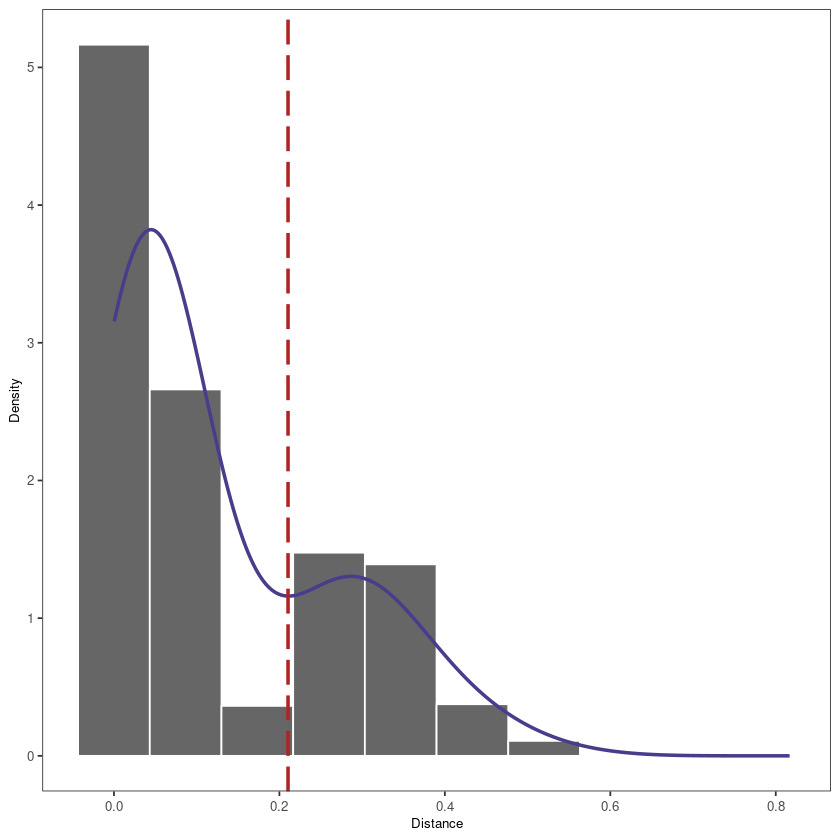

In [2]:
# finding threshold of both heavy and light chains
dist_ham_h_l <- distToNearest(filter(db, locus == c("IGH", "IGI", "IGK", "IGL")))

output_h_l <- findThreshold(dist_ham_h_l$dist_nearest)
threshold_h_l <- output_h_l@threshold

plotDensityThreshold(output_h_l)

In [3]:
# Method 0. 
# Clonal assignment using identical clustering

results_id <- identicalClones(dist_ham_h_l, cell_id = "cell_id")

# Get results data.frame
results_db_id <- as.data.frame(results_id)
glimpse(results_db_id)

Running defineClonesScoper in single cell mode



Rows: 1,753
Columns: 59
$ sequence_id        <chr> "ACGATACAGCTAGTCT-1_contig_2", "GTAACGTAGCAGGTCA-1…
$ sequence           <chr> "GGGGAGAGTGGAGAAACAGACTTAGGCCAAATACAGATTGAGAGATTTG…
$ rev_comp           <chr> "F", "F", "F", "F", "F", "F", "F", "F", "F", "F", …
$ productive         <chr> "T", "T", "T", "T", "T", "T", "T", "T", "T", "T", …
$ v_call             <chr> "IGHV1-18*01", "IGHV10-3*01", "IGHV1-78*01", "IGHV…
$ d_call             <chr> "IGHD1-1*01,IGHD2-5*01,IGHD2-6*01", "IGHD2-1*01,IG…
$ j_call             <chr> "IGHJ1*03", "IGHJ1*03", "IGHJ2*01", "IGHJ3*01", "I…
$ sequence_alignment <chr> "GAGGTCCAGCTGCAACAGTCTGGACCT...GAGCTGGTGAAGCCTGGGG…
$ germline_alignment <chr> "GAGGTCCAGCTGCAACAGTCTGGACCT...GAGCTGGTGAAGCCTGGGG…
$ junction           <chr> "TGTGCAAAAGGGGATAGTAGCTACGGGTACTTCGATGTCTGG", "TGT…
$ junction_aa        <chr> "CAKGDSSYGYFDVW", "CVRDPEEGIYYGNYEYFDVW", "CAYYGSS…
$ v_cigar            <chr> "285S292=", "130S302=", "82S290=", "87S288=", "110…
$ d_cigar            <chr> "

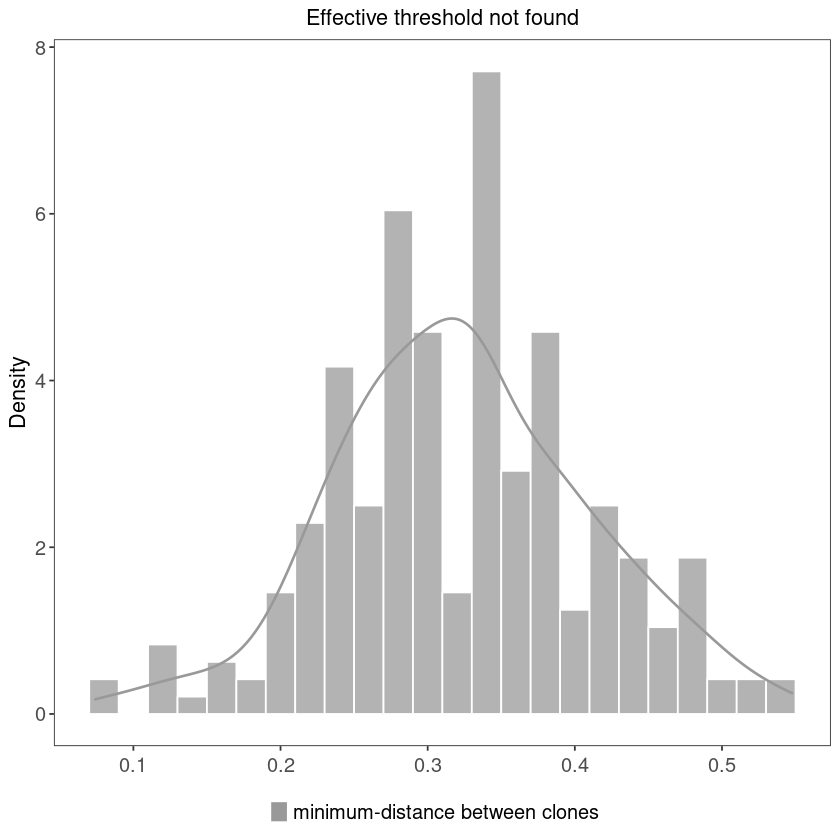

In [4]:
# Plot a histogram of inter and intra clonal distances
plot(results_id, binwidth=0.02)

Warning message in countClones(results_db_id):
“NA(s) found in 848 row(s) of the clone_id column and excluded from tabulation”


clone_id,seq_count,seq_freq
<chr>,<int>,<dbl>
161,12,0.013259669
163,3,0.003314917
253,3,0.003314917
466,3,0.003314917
759,3,0.003314917
111,2,0.002209945


Warning message:
“Removed 2 rows containing missing values (geom_bar).”


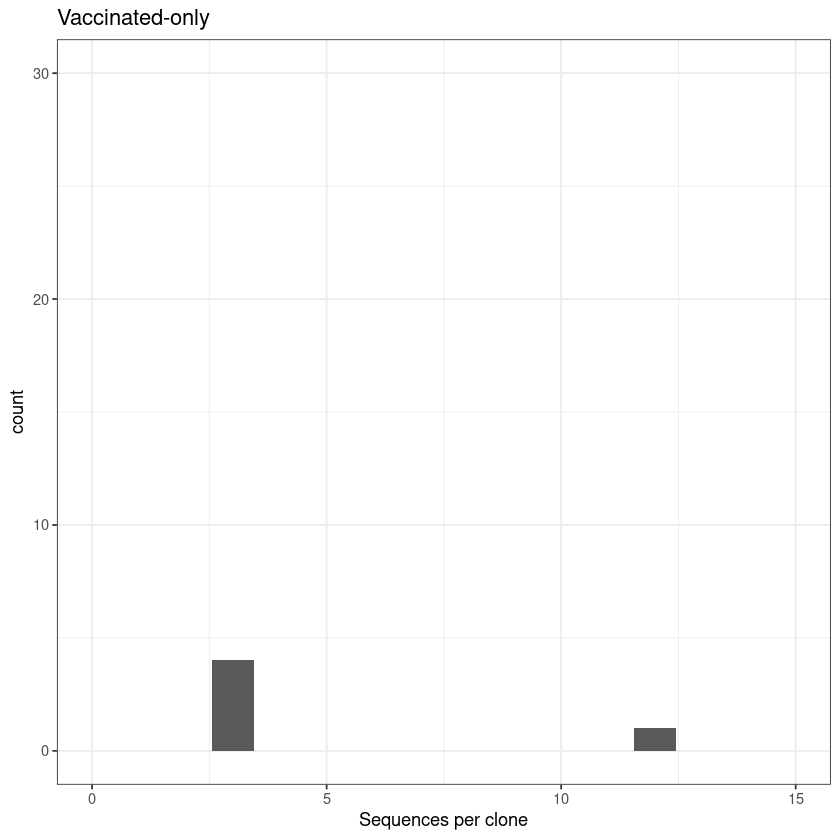

In [17]:
# get clone sizes using dplyr functions
clone_sizes_id <- countClones(results_db_id)
head(clone_sizes_id)
# Plot cells per clone
ggplot(clone_sizes_id, aes(x=seq_count)) + geom_bar() + theme_bw() + xlab("Sequences per clone") + xlim(0, 15) + ylim(0, 30)  + ggtitle("Vaccinated-only")

In [18]:
# Method 1. 
# Clonal assignment using hierarchical clustering
# it is a fixed distance-based (supervised) model to identify clonally-related sequences 
# aka a shared common ancestor, rather than independently risen.
# using a manual threshold assignment
# this threshold is defined by distToNeares function is shazam

results_hierar <- hierarchicalClones(dist_ham_h_l, threshold=0.2, cell_id = "cell_id", only_heavy = FALSE)

# Get results data.frame
results_db_hierar <- as.data.frame(results_hierar)
glimpse(results_db_hierar)

Running defineClonesScoper in single cell mode



Rows: 1,753
Columns: 59
$ sequence_id        <chr> "GTCACGGCACACATGT-1_contig_1", "GTCACGGCACACATGT-1…
$ sequence           <chr> "GAGTATACAGAACTTCATTATGGGATGGAGCCAGATCACCCTCTTTCTG…
$ rev_comp           <chr> "F", "F", "F", "F", "F", "F", "F", "F", "F", "F", …
$ productive         <chr> "T", "T", "T", "T", "T", "T", "T", "T", "T", "T", …
$ v_call             <chr> "IGHV1-11*01", "IGKV6-23*01", "IGHV1-42*01", "IGHV…
$ d_call             <chr> "IGHD1-3*01", "", "IGHD3-1*01,IGHD3-2*01,IGHD3-3*0…
$ j_call             <chr> "IGHJ4*01", "IGKJ1*01", "IGHJ1*03", "IGHJ2*01", "I…
$ sequence_alignment <chr> "CAGATCCAGCTGCAACAGTCAGGAGCT...GAGCTGGCGAGTCCTGGGG…
$ germline_alignment <chr> "CAGATCCAGCTGCAACAGTCAGGAGCT...GAGCTGGCGAGTCCTGGGG…
$ junction           <chr> "TGTGGAAGGAATAACCTCTATGCTATGGACTACTGG", "TGTCAGCAA…
$ junction_aa        <chr> "CGRNNLYAMDYW", "CQQYSSYPWTF", "CARSGGRGYFDVW", "C…
$ v_cigar            <chr> "76S294=", "95S284=", "114S294=", "110S294=", "108…
$ d_cigar            <chr> "

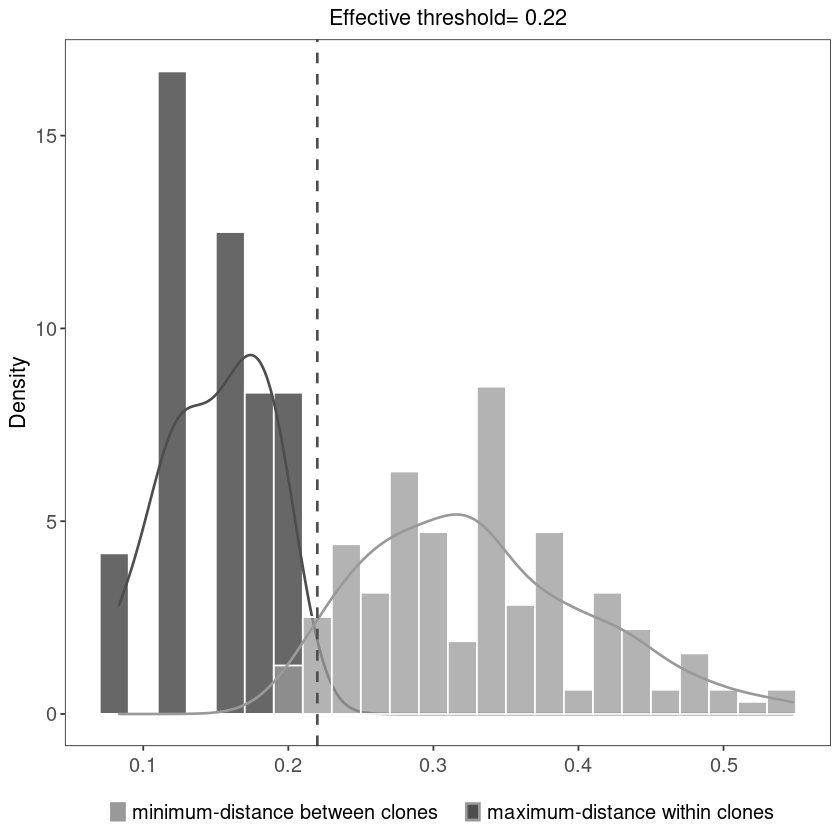

In [19]:
# Plot a histogram of inter and intra clonal distances
plot(results_hierar, binwidth=0.02)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



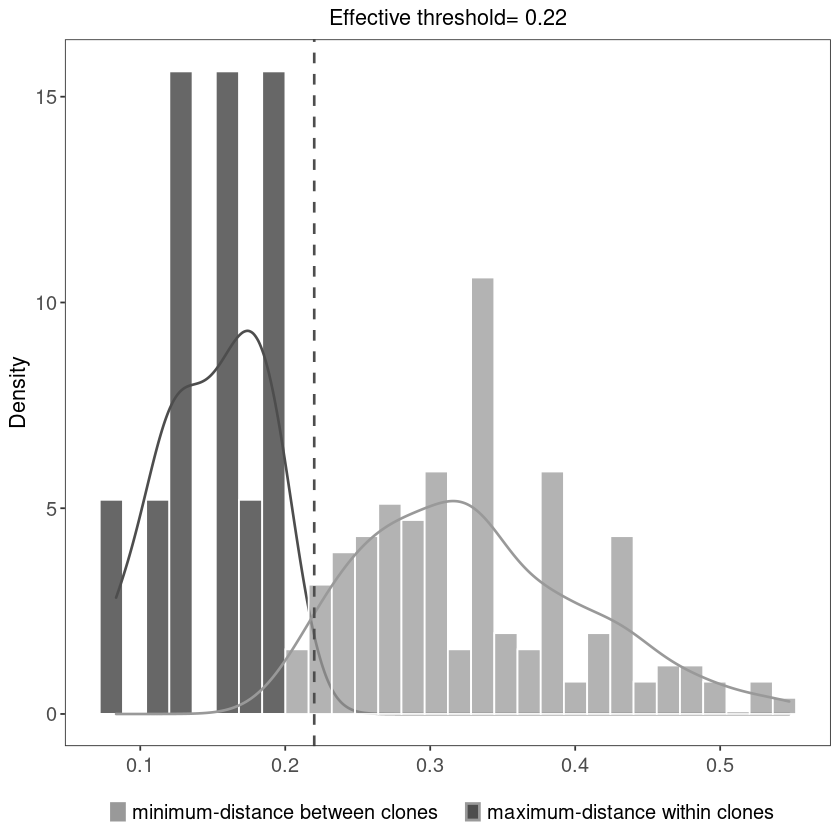

In [20]:
plotCloneSummary(results_hierar)

Warning message in countClones(results_db_hierar):
“NA(s) found in 848 row(s) of the clone_id column and excluded from tabulation”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


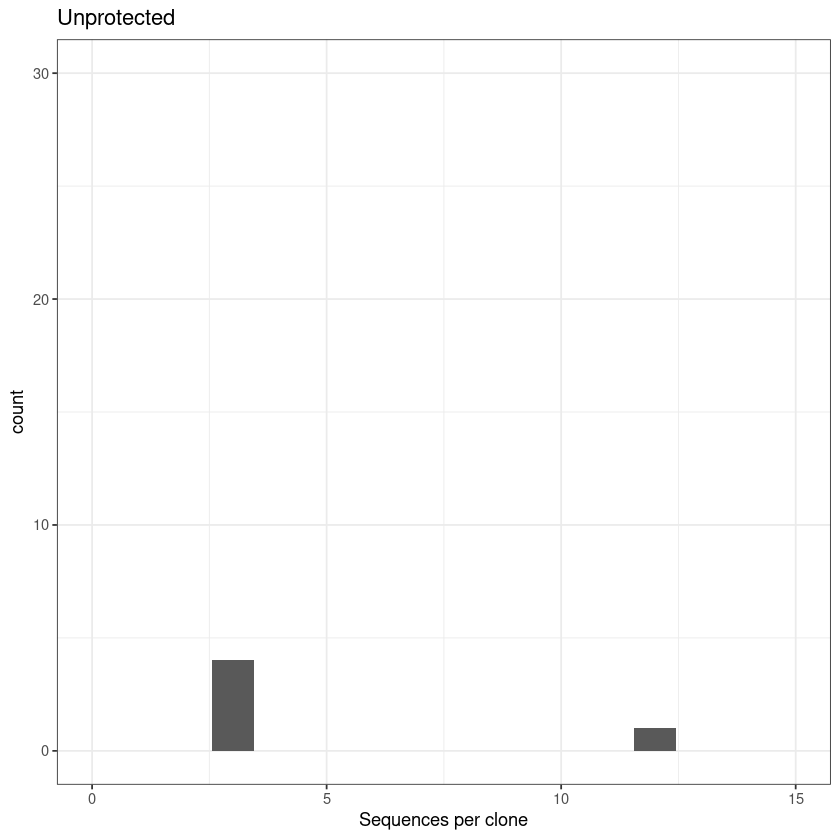

In [21]:
# get clone sizes using dplyr functions
clone_sizes_hierar <- countClones(results_db_hierar)

# Plot cells per clone
ggplot(clone_sizes_hierar, aes(x=seq_count)) + geom_bar() + theme_bw() + xlab("Sequences per clone") + xlim(0, 15) + ylim(0, 30)  + ggtitle("Unprotected")

Running defineClonesScoper in single cell mode



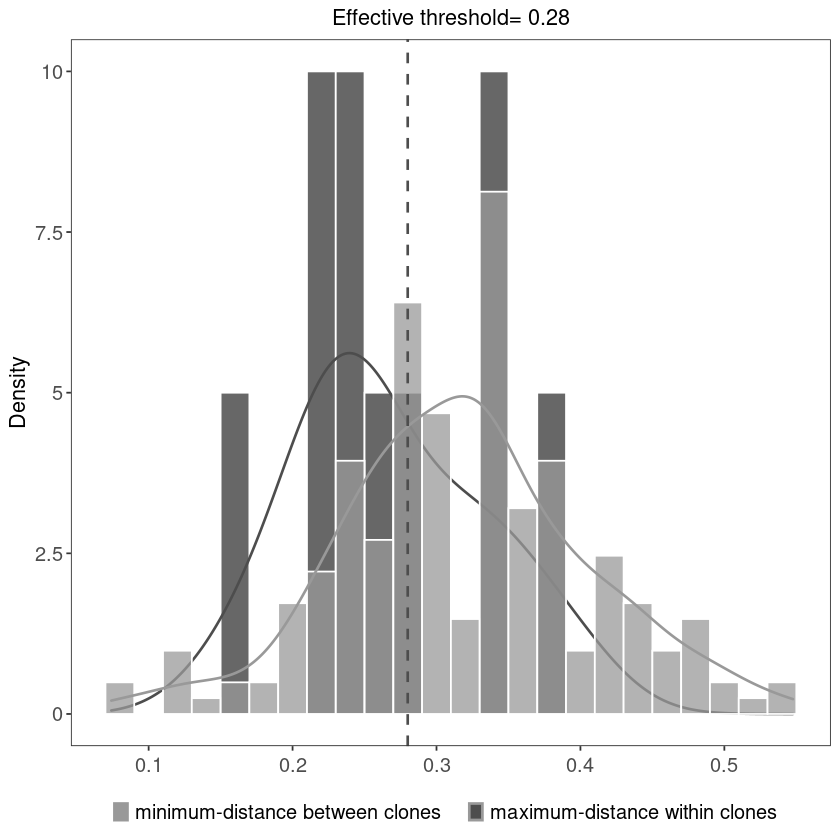

In [10]:
# Method 2. 
# Clonal assignment using the spectral clustering (unsupervised) method novj
# This function concludes the clonal relationships using an adaptive unsupervised threshold
# to indicate the similarity levels within junction sequences in a local neighbor.
results <- spectralClones(dist_ham_h_l, method="novj", cell_id = "cell_id")
# Plot a histogram of inter and intra clonal distances
plot(results, binwidth=0.02)

Running defineClonesScoper in single cell mode



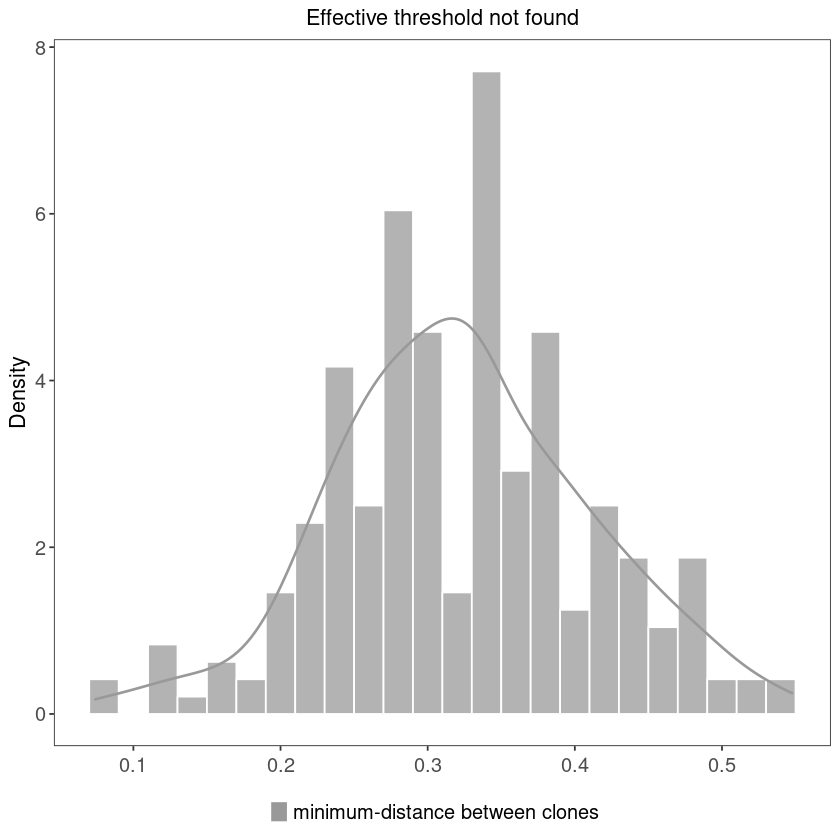

In [11]:
# Clonal assignment using the spectral clustering method novj with threshold
results <- spectralClones(dist_ham_h_l, method="novj", threshold=0.2, cell_id = "cell_id")
# Plot a histogram of inter and intra clonal distances
plot(results, binwidth=0.02)